In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
netflix_data = pd.read_csv("/content/netflix_titles.csv")

In [4]:
# Gives information about the dataset like total number records, columns types etc.
netflix_data.info()

# Show first 5 rows
netflix_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [5]:
# Removing duplicate rows
netflix_data = netflix_data.drop_duplicates()

# Filling NaN values with 'Unknown'
netflix_data = netflix_data.fillna('Unknown')

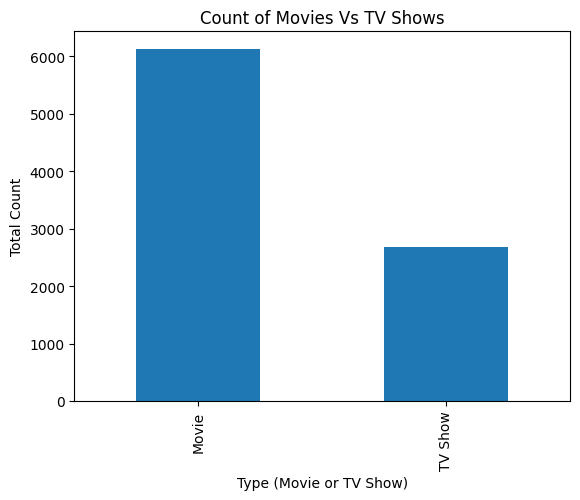

In [10]:
# Count of Movies vs TV Shows
netflix_data['type'].value_counts().plot(kind='bar')
plt.title('Count of Movies Vs TV Shows')
plt.xlabel('Type (Movie or TV Show)')
plt.ylabel('Total Count')
plt.show()

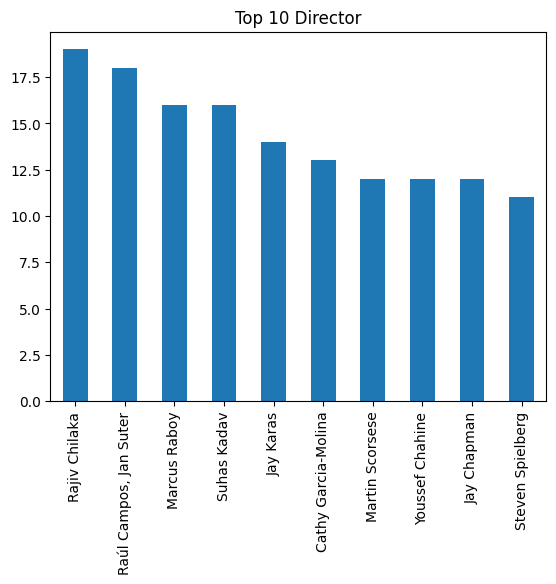

In [11]:
# Top director in terms of release
netflix_data[netflix_data['director'] != 'Unknown']['director'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Director')
plt.show()

In [13]:
# Filter out TV shows
movies = netflix_data[netflix_data['type'] == 'Movie']

# Filter out 'Unknown' values
movies = movies[movies['duration'] != 'Unknown']

# Remove 'min' from 'duration' and convert to integer
movies['duration'] = movies['duration'].str.replace(' min','').astype(int)

# Calculate average and print
average_duration = movies['duration'].mean()
print(f"The average duration of a movie on Netflix is: {average_duration} minutes")

The average duration of a movie on Netflix is: 99.57718668407311 minutes


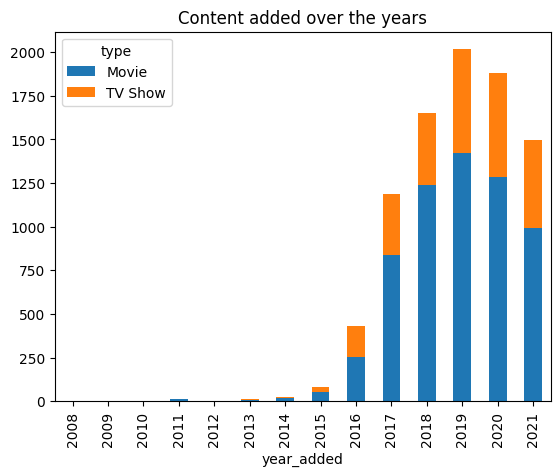

In [15]:
# Filter out 'Unknown' entries in 'date_added' column
netflix_data = netflix_data[netflix_data['date_added'] != 'Unknown']

# Now you can convert 'date_added' to datetime and extract year
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['year_added'] = netflix_data['date_added'].dt.year

# Count number of movies/TV Shows added each year
netflix_data.groupby(['year_added', 'type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Content added over the years')
plt.show()

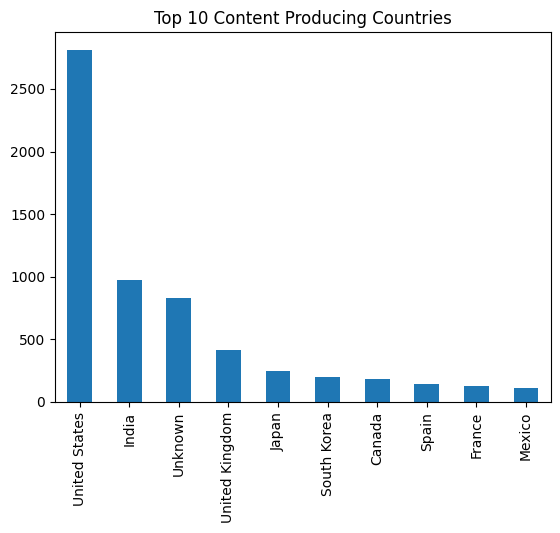

In [16]:
netflix_data['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Content Producing Countries')
plt.show()

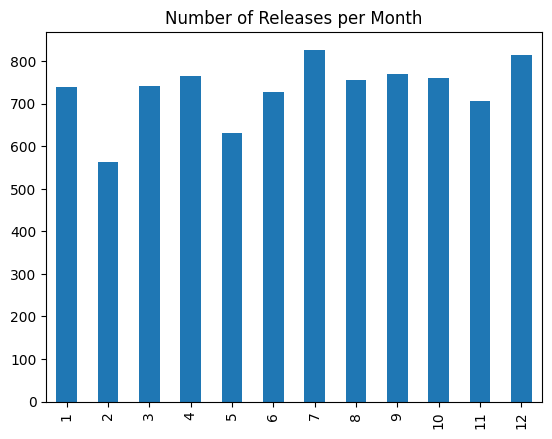

In [18]:
# Extract month from 'date_added' column
netflix_data['month_added'] = netflix_data['date_added'].dt.month

# Count the number of releases in each month
netflix_data['month_added'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Releases per Month')
plt.show()

In [19]:
# Assuming 'duration' column now only contains numerical values for movies
movie_categories = movies['listed_in'].str.split(', ', expand=True)

# For every category in movie_categories, calculate the average 'duration'
for category in movie_categories:
    avg_duration = movies.loc[movie_categories[category].notnull(), 'duration'].mean()
    print(f"The average movie duration in the {category} category is: {avg_duration} minutes")

The average movie duration in the 0 category is: 99.57718668407311 minutes
The average movie duration in the 1 category is: 105.63333333333334 minutes
The average movie duration in the 2 category is: 111.17808219178082 minutes
